# Project Main Workbook

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVC, SVC
from category_encoders import TargetEncoder
from category_encoders import BinaryEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, average_precision_score, roc_auc_score, accuracy_score
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

## 1) Initial Data Exploration

In [3]:
df = pd.read_csv('../Data/Credit_card.csv')
df_label = pd.read_csv('../Data/Credit_card_label.csv')

In [4]:
df.head(5)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [5]:
credit_df = df.merge(df_label, on = 'Ind_ID')

In [6]:
credit_df.head(5)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


<b> 2 Plot charts to understand data distribution of the target variable. </b>

Application Approved:  1373  Probability:  0.887
Application Rejected:  175 Probability:  0.113


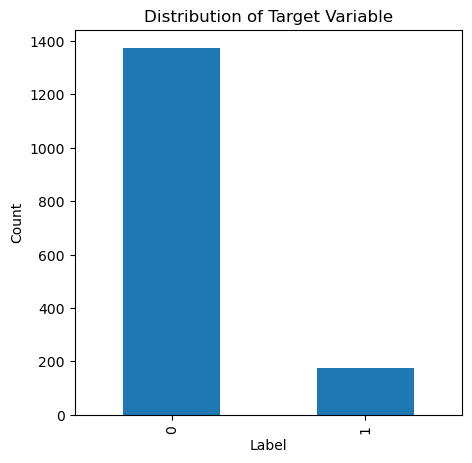

In [7]:
#TARGET VARIABLE DISTRIBUTION

label, count = np.unique(credit_df['label'], return_counts = True)
probability = count/len(credit_df)

print("Application Approved: ", count[0], " Probability: ", probability[0].round(3))
print("Application Rejected: ", count[1], "Probability: ", probability[1].round(3))

plt.figure(figsize = (5, 5))
credit_df['label'].value_counts().plot(kind = 'bar')
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of Target Variable")
#plt.xticks(rotation = '0')
plt.show()

# 0 -> Approved
# 1 -> Rejected

<b> 3 Plot correlation / stacked bar charts to understand the relationship between each variable and the target variable </b>

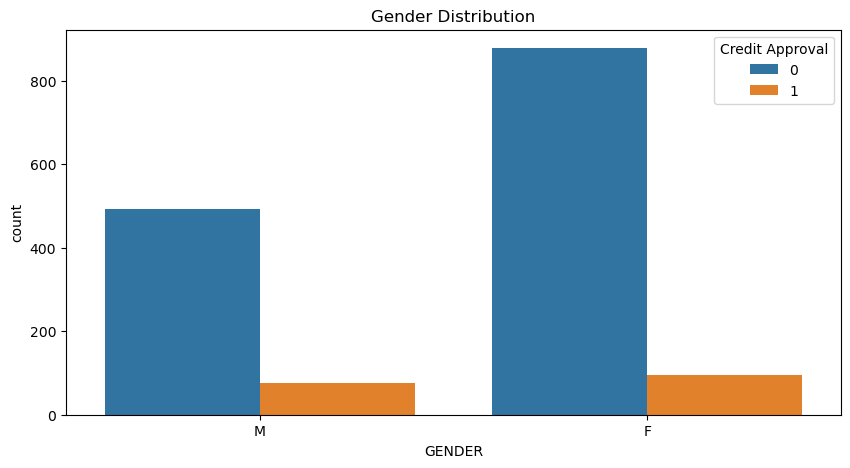

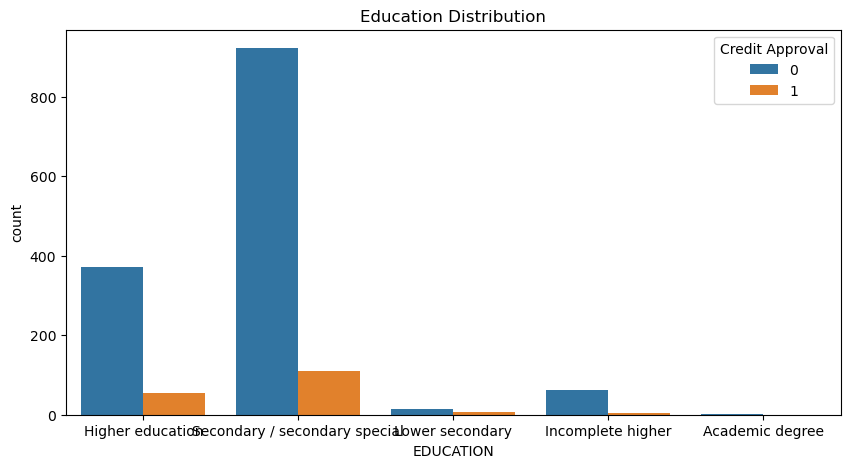

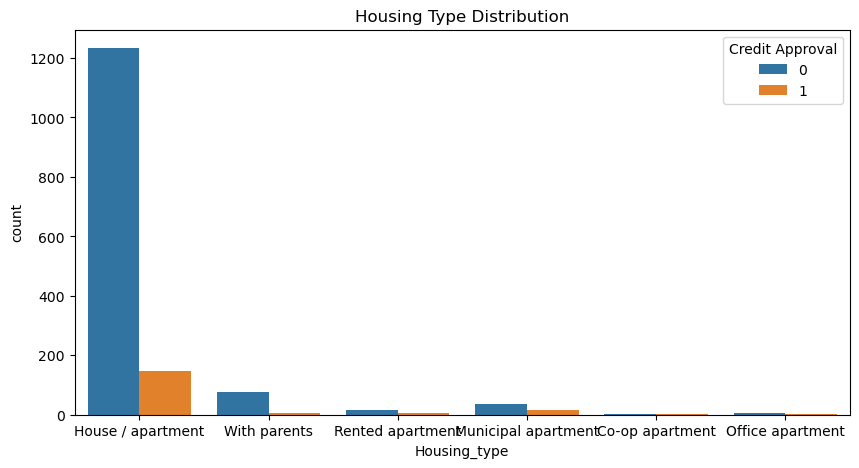

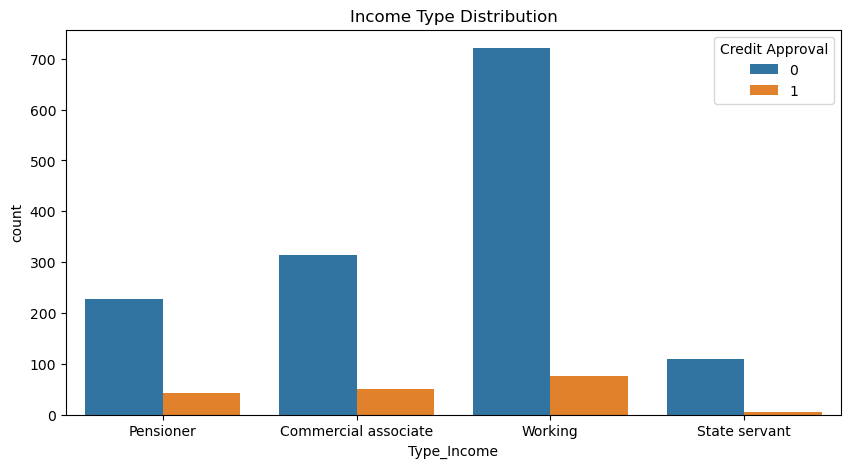

In [8]:
#Distribution of Categorical Variables wrt Target Variable

fig, axes = plt.subplots(figsize = (10, 5))
sns.countplot(data = credit_df, x = 'GENDER', hue = 'label', ax = axes)
plt.legend(loc = 'upper right', title = 'Credit Approval')
plt.title("Gender Distribution")
#plt.xticks(rotation = '45')
plt.show()

fig, axes = plt.subplots(figsize = (10, 5))
sns.countplot(data = credit_df, x = 'EDUCATION', hue = 'label', ax = axes)
plt.legend(loc = 'upper right', title = 'Credit Approval')
plt.title("Education Distribution")
#plt.xticks(rotation = '45')
plt.show()

fig, axes = plt.subplots(figsize = (10, 5))
sns.countplot(data = credit_df, x = 'Housing_type', hue = 'label', ax = axes)
plt.legend(loc = 'upper right', title = 'Credit Approval')
plt.title("Housing Type Distribution")
#plt.xticks(rotation = '45')
plt.show()

fig, axes = plt.subplots(figsize = (10, 5))
sns.countplot(data = credit_df, x = 'Type_Income', hue = 'label', ax = axes)
plt.legend(loc = 'upper right', title = 'Credit Approval')
plt.title("Income Type Distribution")
#plt.xticks(rotation = '45')
plt.show()


<b> 1 Plot charts to understand data distribution of the numerical / categorical variables. </b>

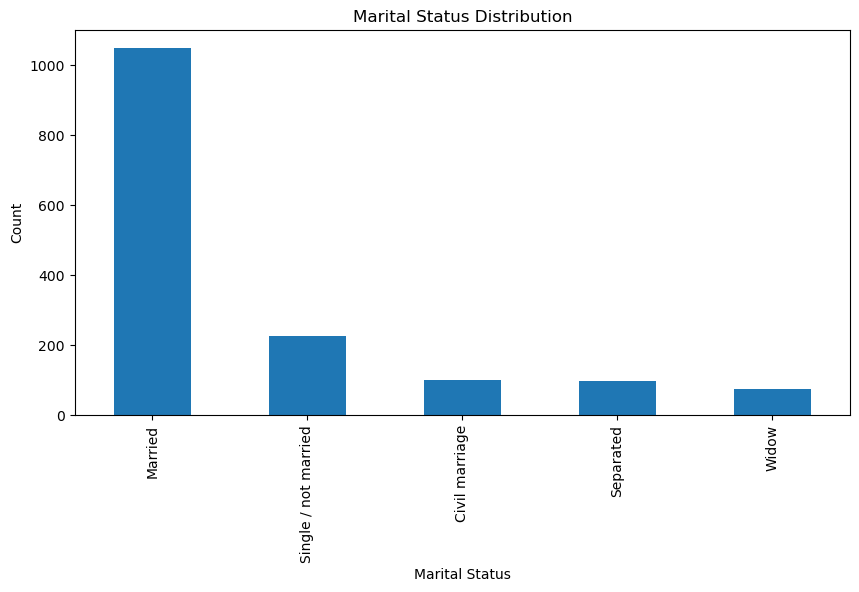

In [9]:
#Marital Status Distribution 

plt.figure(figsize = (10, 5))
credit_df['Marital_status'].value_counts().plot(kind = 'bar')
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.title("Marital Status Distribution")
#plt.xticks(rotation = '45')
plt.show()

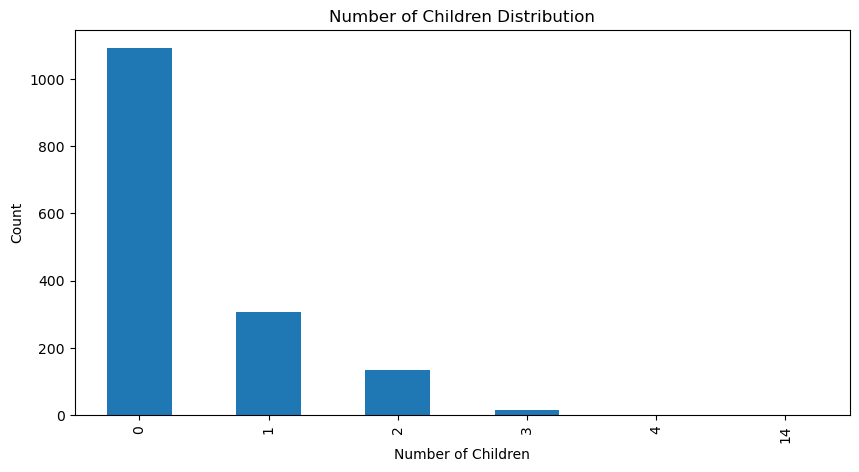

In [10]:
#Number of Children Distribution

plt.figure(figsize = (10, 5))
credit_df['CHILDREN'].value_counts().plot(kind = 'bar')
plt.xlabel("Number of Children")
plt.ylabel("Count")
plt.title("Number of Children Distribution")
#plt.xticks(rotation = '0')
plt.show()

#14 seems to be an outlier

<b> 4 Plot correlation between each of the input variables </b>

In [11]:
credit_df['Employment_Status'] = np.where(credit_df['Employed_days'] > 0 , 'Unemployed', 'Employed')
credit_df['Employed_days'] = credit_df['Employed_days'].apply(lambda x: min(x, 0)) # Lots of errors with Unemployed category - bound at 0 for Unemployed
credit_df.head(5)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Employment_Status
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,0,1,0,0,0,NaN,2,1,Unemployed
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1,Employed
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1,Employed
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1,Employed
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1,Employed


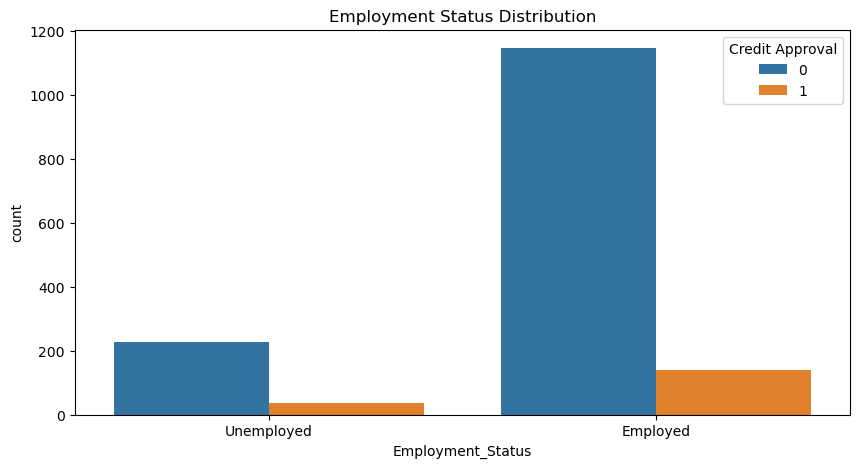

In [12]:
#Employment Status wrt Target Variable

plt.figure(figsize = (10, 5))
sns.countplot(data = credit_df, x = 'Employment_Status', hue = 'label')
plt.legend(loc = 'upper right', title = 'Credit Approval')
plt.title("Employment Status Distribution")
#plt.xticks(rotation = '45')
plt.show()

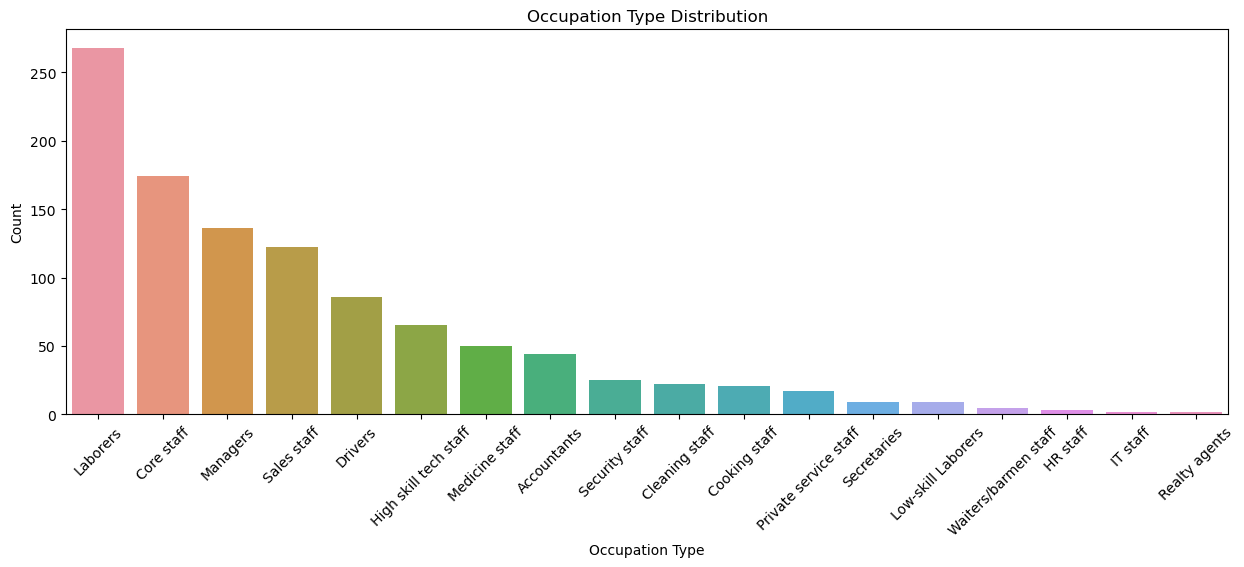

Laborers                 268
Core staff               174
Managers                 136
Sales staff              122
Drivers                   86
High skill tech staff     65
Medicine staff            50
Accountants               44
Security staff            25
Cleaning staff            22
Cooking staff             21
Private service staff     17
Secretaries                9
Low-skill Laborers         9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: Type_Occupation, dtype: int64

In [13]:
#Occupation Type Distribution
plt.figure(figsize = (15, 5))
sns.barplot(x = df['Type_Occupation'].value_counts().index, y = df['Type_Occupation'].value_counts().values)
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.title('Occupation Type Distribution')
plt.xticks(rotation = 45)
plt.show()
df['Type_Occupation'].value_counts()

# 2) Cleaning and Sampling

<b> 1 Perform missing value analysis, describe how potentially to encode missing values </b>

In [14]:
missing_values = credit_df.isnull().sum()
cols_with_missing_values = missing_values[missing_values > 0].index.tolist()

print(f"Columns with missing values: {cols_with_missing_values}")

Columns with missing values: ['GENDER', 'Annual_income', 'Birthday_count', 'Type_Occupation']


In [15]:
missing_values_count = credit_df.isnull().sum()
print(missing_values_count)

Ind_ID                 0
GENDER                 7
Car_Owner              0
Propert_Owner          0
CHILDREN               0
Annual_income         23
Type_Income            0
EDUCATION              0
Marital_status         0
Housing_type           0
Birthday_count        22
Employed_days          0
Mobile_phone           0
Work_Phone             0
Phone                  0
EMAIL_ID               0
Type_Occupation      488
Family_Members         0
label                  0
Employment_Status      0
dtype: int64


In [16]:
credit_df['GENDER'].fillna('U', inplace=True)

In [17]:
credit_df['Annual_income'].fillna(credit_df['Annual_income'].median(), inplace=True)

In [18]:
credit_df['Birthday_count'].fillna(credit_df['Birthday_count'].median(), inplace=True)

In [19]:
credit_df['Type_Occupation'].fillna('Unknown', inplace=True)

The columns with missing values can be encoded in the following ways:

1. Gender - Since there are only 7 missing values, a new category can be assigned to it 'U', indicating the gender is Unknown. 

2. Annual Income - Median can be used to fill missing values since it is less affected by outliers and extreme values that might be present. 

3. Birthday Count - Median imputation can be used because it is robust against the influence of outliers and skewed data. 

4. Type of Occupation - The most neutral way to avoid bias in the dataset is to create a new category called "Unknown," as the variable is categorical and the modes of the categories are not highly dominant.

<b> 2 Describe how to encode each of the categorical features ie) OHE, target encoding, ordinal encoding </b>

In [20]:
categorical_columns = credit_df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION',
       'Marital_status', 'Housing_type', 'Type_Occupation',
       'Employment_Status'],
      dtype='object')


In [21]:
categorical_columns = ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION',
                       'Marital_status', 'Housing_type', 'Type_Occupation', 'Employment_Status']
categories_dict = {}

for col in categorical_columns:
    categories_dict[col] = credit_df[col].unique()
for col, categories in categories_dict.items():
    print(f"The unique categories in {col} are: {categories}")

The unique categories in GENDER are: ['M' 'F' 'U']
The unique categories in Car_Owner are: ['Y' 'N']
The unique categories in Propert_Owner are: ['Y' 'N']
The unique categories in Type_Income are: ['Pensioner' 'Commercial associate' 'Working' 'State servant']
The unique categories in EDUCATION are: ['Higher education' 'Secondary / secondary special' 'Lower secondary'
 'Incomplete higher' 'Academic degree']
The unique categories in Marital_status are: ['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']
The unique categories in Housing_type are: ['House / apartment' 'With parents' 'Rented apartment'
 'Municipal apartment' 'Co-op apartment' 'Office apartment']
The unique categories in Type_Occupation are: ['Unknown' 'Core staff' 'Cooking staff' 'Laborers' 'Sales staff'
 'Accountants' 'High skill tech staff' 'Managers' 'Cleaning staff'
 'Drivers' 'Low-skill Laborers' 'IT staff' 'Waiters/barmen staff'
 'Security staff' 'Medicine staff' 'Private service staff' 'HR staff'


In [22]:
# Ordinal Encoding for Binary Categorical Variables 
credit_df['Car_Owner'] = credit_df['Car_Owner'].map({'Y': 1, 'N': 0})
credit_df['Propert_Owner'] = credit_df['Propert_Owner'].map({'Y': 1, 'N': 0})
credit_df['Employment_Status'] = credit_df['Employment_Status'].map({'Employed': 1, 'Unemployed': 0})

# Binary Encoding 
bin_encoder = BinaryEncoder(cols=['Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'GENDER'])
credit_df = bin_encoder.fit_transform(credit_df)

#Target Encoding 
target_enc = TargetEncoder(cols=['Type_Occupation'])
credit_df['Type_Occupation_encoded'] = target_enc.fit_transform(credit_df['Type_Occupation'], credit_df['label'])

# Transform or Drop Other Columns
credit_df['Annual_income'] = np.log(credit_df['Annual_income']+1)
credit_df['Employed_days'] = np.log(-1*credit_df['Employed_days']+1)
credit_df.drop(columns = ['Ind_ID', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation'], inplace = True)

* For categorical variables with only 2 categories such as Car Owner, Property Owner, and Employment Status, ordinal encoding is used. 
* For categorical variables with 3+ categories such as Gender, Type of Income, Marital Status, Housing Type and Education, binary encoding is used because it doesn’t impose an ordinal relationship and it reduces the dimensionality compared to one-hot encoding.
* For Type of Occupation, target encoding can be used since it has high cardinality and can capture more information about the target variable within the feature which could be helpful for the predictive model. 

# 3) Insights from Data Exploration


<b> 1 Describe which features if any need to be dropped, scaled, etc. </b>

In [23]:
# Correlation matrix of the features
X = credit_df.drop(columns=['label'])
X.corr().style.background_gradient()

,GENDER_0,GENDER_1,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income_0,Type_Income_1,Type_Income_2,EDUCATION_0,EDUCATION_1,EDUCATION_2,Marital_status_0,Marital_status_1,Marital_status_2,Housing_type_0,Housing_type_1,Housing_type_2,Birthday_count,Employed_days,Family_Members,Employment_Status,Type_Occupation_encoded
GENDER_0,1.000000,-0.990338,-0.366257,0.038264,-0.063068,-0.261578,0.018140,-0.162063,0.030436,0.023769,0.031611,-0.039138,0.157111,-0.008687,-0.034689,-0.022500,-0.092016,0.050599,-0.182646,-0.143313,-0.099406,-0.178164,-0.072712
GENDER_1,-0.990338,1.000000,0.371265,-0.042567,0.061377,0.272329,-0.015680,0.157758,-0.029853,-0.025745,-0.039430,0.047788,-0.155746,0.007084,0.032827,0.020453,0.094398,-0.052128,0.185830,0.143397,0.097558,0.178355,0.073153
Car_Owner,-0.366257,0.371265,1.000000,0.002401,0.063467,0.240758,0.011206,0.122456,-0.054377,-0.026728,-0.124354,0.136424,-0.108939,-0.094159,0.114087,-0.051825,0.018755,0.033034,0.144234,0.127441,0.119851,0.151988,-0.037197
Propert_Owner,0.038264,-0.042567,0.002401,1.000000,-0.003352,0.029209,-0.034443,-0.065293,0.014161,-0.023973,-0.006926,0.039006,0.010517,-0.000017,0.002480,-0.151428,-0.146629,0.214541,-0.124409,-0.091309,-0.004458,-0.100400,0.040626
CHILDREN,-0.063068,0.061377,0.063467,-0.003352,1.000000,0.065001,0.035128,0.169231,-0.074514,0.040460,-0.068209,0.050708,-0.065258,-0.116856,0.115338,-0.047661,0.008397,0.016188,0.277944,0.204940,0.890248,0.219416,-0.051616
Annual_income,-0.261578,0.272329,0.240758,0.029209,0.065001,1.000000,0.045998,0.145728,-0.221171,0.027732,-0.247899,0.228366,-0.045326,0.047315,-0.042895,-0.049977,0.034953,0.010047,0.127576,0.213060,0.046517,0.211530,-0.067953
Type_Income_0,0.018140,-0.015680,0.011206,-0.034443,0.035128,0.045998,1.000000,-0.494672,-0.423904,0.020718,-0.067471,0.050576,-0.022025,-0.003475,0.019347,0.035923,0.007230,-0.011553,0.060405,0.165652,0.042123,0.128171,-0.031496
Type_Income_1,-0.162063,0.157758,0.122456,-0.065293,0.169231,0.145728,-0.494672,1.000000,-0.011717,0.053291,-0.074810,0.048312,-0.164338,0.056963,-0.019612,-0.053880,0.095149,-0.032703,0.496647,0.715289,0.178515,0.782691,-0.071360
Type_Income_2,0.030436,-0.029853,-0.054377,0.014161,-0.074514,-0.221171,-0.423904,-0.011717,1.000000,-0.062136,0.191091,-0.152219,0.076296,-0.054936,0.012491,-0.008105,-0.031622,0.023586,-0.197813,-0.298648,-0.080027,-0.302358,0.073041
EDUCATION_0,0.023769,-0.025745,-0.026728,-0.023973,0.040460,0.027732,0.020718,0.053291,-0.062136,1.000000,-0.316941,-0.125401,0.002652,0.062141,-0.018317,-0.031010,0.048715,-0.006234,0.157438,0.060166,0.025250,0.073092,0.023103


* 'CHILDREN' and 'Family_Members' have correlation of 0.89. 
* 'Employed_days' and 'Employment_Status' have correlation of 0.95

In [24]:
# Drop the 'CHILDREN' column because of its high correlation with 'Family_Members'
# Drop the 'Employment_Status' column because of its high correlation with 'Employed_days'
X.drop(columns=['CHILDREN', 'Employment_Status'], inplace = True)

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   GENDER_0                 1548 non-null   int64  
 1   GENDER_1                 1548 non-null   int64  
 2   Car_Owner                1548 non-null   int64  
 3   Propert_Owner            1548 non-null   int64  
 4   Annual_income            1548 non-null   float64
 5   Type_Income_0            1548 non-null   int64  
 6   Type_Income_1            1548 non-null   int64  
 7   Type_Income_2            1548 non-null   int64  
 8   EDUCATION_0              1548 non-null   int64  
 9   EDUCATION_1              1548 non-null   int64  
 10  EDUCATION_2              1548 non-null   int64  
 11  Marital_status_0         1548 non-null   int64  
 12  Marital_status_1         1548 non-null   int64  
 13  Marital_status_2         1548 non-null   int64  
 14  Housing_type_0          

**Scaling**

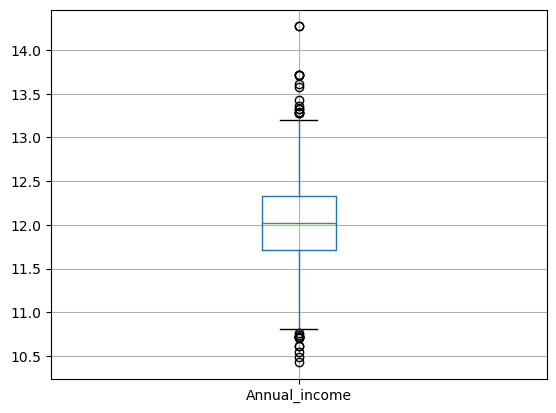

In [26]:
boxplot = X.boxplot(column=['Annual_income'])

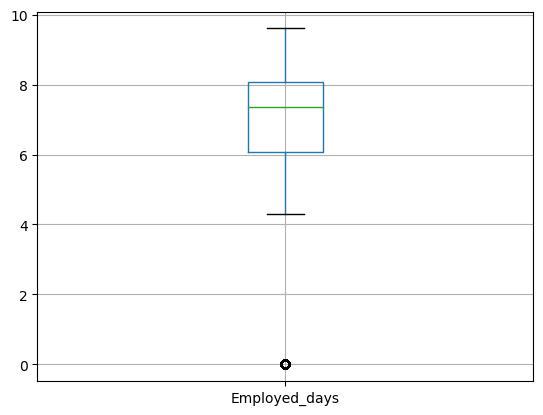

In [27]:
boxplot = X.boxplot(column=['Employed_days'])

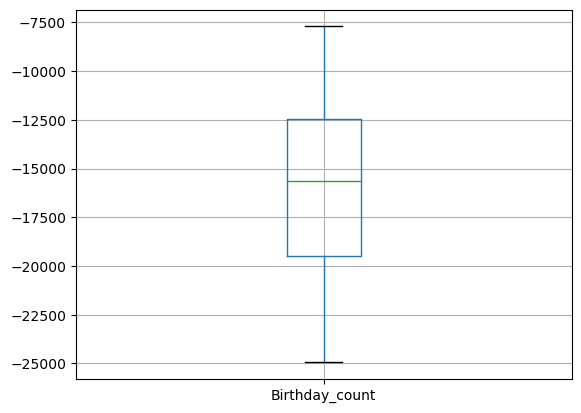

In [28]:
boxplot = X.boxplot(column=['Birthday_count'])

In [29]:
s = StandardScaler()
X = s.fit_transform(X)

<b> 3 Describe the sampling method for the train/dev split, cross-validation etc. </b>

In [30]:
# Devide the train, val, test dataset. Here keep the X_dev df for the convenience of training the whole dev set after model fine-tuning.
y = credit_df['label']
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

The number of approved applications significantly outnumber the rejected ones - to maintain the distribution of the label across train, test and validation sets, stratified sampling is used. It ensures that each set has the same percentage of samples of each target class as the complete set. 



Overall findings from (1)-(2) </b>

The dataset is imbalanced. It's a combination of categorical and numerical features. 

There are missing values in the column 'GENDER', 'Annual_income', 'Birthday_count', and 'Type_Occupation'. We create a new category of Unknown for the NAN in 'GENDER' and 'Type_Occupation', and fill the NAN in 'Annual_income' and 'Birthday_count' with the median respectively.

Then we use ordinal encoding for categorical variables with only 2 categories, one-hot encoding for categorical variables with 3+ categories, and target encoding for 'Type_Occupation'. Then we scale the whole dataset.

We drop columns that are irrelevant (contain ID information) and columns with high correlation (>0.8). Then we use stratified sampling to split 80% of the dataset to the development set, and 20% to testing set.

# 4) Machine Learning Techniques Implemented

For all machine learning techniques, use:
* Oversampling, Undersampling, SMOTE, etc.
* Appropriate model evaluation metric (can use accuracy if resampling is used)
* 5-fold Cross-Validation on Development set
* Hyperparameter tuning

# <b> 4.1.1 Logistic Regression </b>

Using SMOTE to handle the imbalance present in this dataset. 

In [44]:
smote = SMOTE(random_state=42)
X_dev_smote, y_dev_smote = smote.fit_resample(X_dev, y_dev)

In [45]:
print("Positive and Negative Labels after Oversampling:\n", y_dev_smote.value_counts())
print("\nShape of Development Set: ", X_dev_smote.shape)

Positive and Negative Labels after Oversampling:
 0    1098
1    1098
Name: label, dtype: int64

Shape of Development Set:  (2196, 21)


***Baseline Model***

In [67]:
logreg = LogisticRegression()
logreg.fit(X_dev_smote, y_dev_smote)

y_pred = logreg.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Average Precision Score:", average_precision_score(y_test, y_pred))

Test Accuracy: 0.6645161290322581
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.67      0.78       275
           1       0.20      0.66      0.31        35

    accuracy                           0.66       310
   macro avg       0.57      0.66      0.54       310
weighted avg       0.86      0.66      0.73       310

Average Precision Score: 0.17013824884792628


***Hyperparameter Tuning***

In [68]:

param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100], 
    'logisticregression__penalty': ['l1', 'l2'], 
    'logisticregression__solver': ['liblinear', 'saga']
}

logreg_pipeline = make_pipeline(LogisticRegression(max_iter=2000))

grid_search = GridSearchCV(logreg_pipeline, param_grid, cv=5, scoring='average_precision')
grid_search.fit(X_dev_smote, y_dev_smote)

print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)


print("Test Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report for Best Model:\n", classification_report(y_test, y_pred_best))
print("Average Precision Score for Best Model:", average_precision_score(y_test, y_pred_best))


/Users/mansi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Parameters: {'logisticregression__C': 100, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}
Test Accuracy: 0.667741935483871
Classification Report for Best Model:
               precision    recall  f1-score   support

           0       0.94      0.67      0.78       275
           1       0.20      0.66      0.31        35

    accuracy                           0.67       310
   macro avg       0.57      0.66      0.55       310
weighted avg       0.86      0.67      0.73       310

Average Precision Score for Best Model: 0.17129113105344007


# <b> 4.1.2 Support Vector Machines </b>

***Baseline Model***

In [65]:
svm_baseline = SVC()
svm_baseline.fit(X_dev_smote, y_dev_smote)

y_pred_train_baseline = svm_baseline.predict(X_dev_smote)
y_pred_test_baseline = svm_baseline.predict(X_test)

print("Baseline Model - Training Accuracy:", accuracy_score(y_dev_smote, y_pred_train_baseline))
print("Baseline Model - Test Accuracy:", accuracy_score(y_test, y_pred_test_baseline))
print("Baseline Model - Classification Report (Test):\n", classification_report(y_test, y_pred_test_baseline))
print("Average Precision Score:", average_precision_score(y_test, y_pred_test_baseline))

Baseline Model - Training Accuracy: 0.8743169398907104
Baseline Model - Test Accuracy: 0.7774193548387097
Baseline Model - Classification Report (Test):
               precision    recall  f1-score   support

           0       0.93      0.81      0.87       275
           1       0.26      0.54      0.36        35

    accuracy                           0.78       310
   macro avg       0.60      0.68      0.61       310
weighted avg       0.86      0.78      0.81       310

Average Precision Score: 0.1948668714797747


***Hyperparameter Tuning***

In [66]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svm_grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='average_precision')
svm_grid.fit(X_dev_smote, y_dev_smote)

print("Best Parameters:", svm_grid.best_params_)

best_svm = svm_grid.best_estimator_
y_pred_train_best = best_svm.predict(X_dev_smote)
y_pred_test_best = best_svm.predict(X_test)

print("Tuned Model - Training Accuracy:", accuracy_score(y_dev_smote, y_pred_train_best))
print("Tuned Model - Test Accuracy:", accuracy_score(y_test, y_pred_test_best))
print("Tuned Model - Classification Report (Test):\n", classification_report(y_test, y_pred_test_best))
print("Average Precision Score:", average_precision_score(y_test, y_pred_test_best))

Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Tuned Model - Training Accuracy: 0.9644808743169399
Tuned Model - Test Accuracy: 0.8612903225806452
Tuned Model - Classification Report (Test):
               precision    recall  f1-score   support

           0       0.94      0.91      0.92       275
           1       0.41      0.51      0.46        35

    accuracy                           0.86       310
   macro avg       0.67      0.71      0.69       310
weighted avg       0.88      0.86      0.87       310

Average Precision Score: 0.26522832006702973


SVM performs better than Logistic regression. 

- For the majority class (class 0 - approved), both models showed high precision, but SVM demonstrated better recall.

- For the minority class (class 1 - rejected), SVM had a lower precision than Logistic Regression but a higher recall. This indicates that SVM was more effective in identifying rejected applications, though it also made more false positive errors.

- The improved recall for SVM, especially for the minority class, is critical in imbalanced datasets, as it can detect the minority class. 

- SVM showed a higher F1-score for both classes, this indicates a better balance between precision and recall.

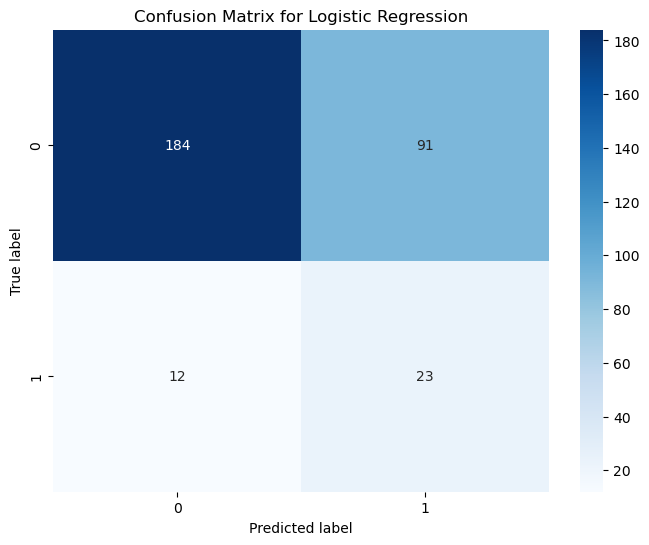

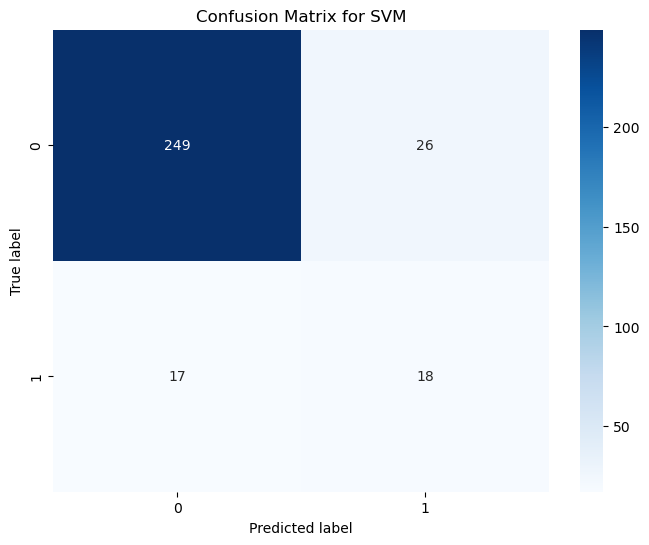

In [69]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_best)  
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# Confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_test_best)  
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for SVM")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()
